In [6]:
from mainnet_launch.database.views import fetch_autopool_destination_state_df
from mainnet_launch.database.postgres_operations import get_full_table_as_df_with_tx_hash
from mainnet_launch.database.schema.full import *
from mainnet_launch.constants import AUTO_ETH
import plotly.express as px

destination_state_df = fetch_autopool_destination_state_df(AUTO_ETH)


safe_tvl_by_destination = (
    destination_state_df.groupby(["datetime", "readable_name"])[["autopool_implied_safe_value"]]
    .sum()
    .reset_index()
    .pivot(values="autopool_implied_safe_value", index="datetime", columns="readable_name")
).fillna(0)

backing_tvl_by_destination = (
    destination_state_df.groupby(["datetime", "readable_name"])[["autopool_implied_backing_value"]]
    .sum()
    .reset_index()
    .pivot(values="autopool_implied_backing_value", index="datetime", columns="readable_name")
).fillna(0)
# 2025 9 -1

# This appear to have backing drop down a huge amount for many destinations, some to 0 others to smaller percents 10ish percent
restricted = backing_tvl_by_destination.loc["2025-09-01":"2025-09-02"]
restricted_non_zero = restricted.loc[:, (restricted != 0).any(axis=0)]
non_zero_backing = restricted_non_zero[(restricted_non_zero != 0).any(axis=1)]

print(non_zero_backing)

restricted = safe_tvl_by_destination.loc["2025-09-01":"2025-09-02"]
restricted_non_zero = restricted.loc[:, (restricted != 0).any(axis=0)]
non_zero_safe = restricted_non_zero[(restricted_non_zero != 0).any(axis=1)]

print(non_zero_safe)
pass

readable_name              Balancer Surge Fluid wstETH-wETH (balancerV3)  \
datetime                                                                   
2025-09-01 23:59:59+00:00                                    1432.508707   
2025-09-02 23:59:59+00:00                                     396.627254   

readable_name              Balancer osETH-waWETH (balancerV3)  \
datetime                                                        
2025-09-01 23:59:59+00:00                         3786.693909   
2025-09-02 23:59:59+00:00                         1171.975055   

readable_name              Balancer pxETH/wETH StablePool (balancer)  \
datetime                                                               
2025-09-01 23:59:59+00:00                                 838.942969   
2025-09-02 23:59:59+00:00                                 199.707208   

readable_name              Balancer weETH/rETH StablePool (balancer)  \
datetime                                                               
2

In [5]:
destination_state_df[destination_state_df["readable_name"] == "Curve.fi Factory Pool: ETHx-ETH (curve)"]

,token_address,destination_vault_address,quantity,block,symbol,safe_price,denominated_in,backing,owned_shares,underlying_token_total_supply,...,total_apr_in,underlying_name,exchange_name,datetime,readable_name,portion_owned,autopool_implied_safe_value,autopool_implied_backing_value,autopool_implied_quantity,unweighted_expected_apr
108,0xA35b1B31Ce002FBF2058D22F30f95D405200A15b,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,1281.444333,22055722,ETHx,1.053970,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.055498,0.000000,1937.726079,...,0.085323,Curve.fi Factory Pool: ETHx-ETH,curve,2025-03-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,9.017036
109,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,658.564946,22055722,WETH,1.000000,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.000000,0.000000,1937.726079,...,0.085323,Curve.fi Factory Pool: ETHx-ETH,curve,2025-03-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,9.017036
185,0xA35b1B31Ce002FBF2058D22F30f95D405200A15b,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,1832.333320,22691920,ETHx,1.061973,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.062570,0.000000,3145.057954,...,0.074980,Curve.fi Factory Pool: ETHx-ETH,curve,2025-06-12 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,7.953795
186,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,1332.346905,22691920,WETH,1.000000,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.000000,0.000000,3145.057954,...,0.074980,Curve.fi Factory Pool: ETHx-ETH,curve,2025-06-12 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,7.953795
278,0xA35b1B31Ce002FBF2058D22F30f95D405200A15b,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,1783.689661,22541848,ETHx,1.060166,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.060885,0.000000,2981.278482,...,0.074401,Curve.fi Factory Pool: ETHx-ETH,curve,2025-05-22 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,7.870626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38278,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xC001f23397dB71B17602Ce7D90a983Edc38DB0d1,900.312868,23371915,WETH,1.000000,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.000000,0.000000,2399.444174,...,0.000000,Curve.fi Factory Pool: ETHx-ETH,curve,2025-09-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,0.000000,0.000000,0.000000
38279,0xA35b1B31Ce002FBF2058D22F30f95D405200A15b,0x1Ea622fa030e4a78F4CC2f305dd3c08DA3F08573,1509.349602,23371915,ETHx,1.069150,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,NaN,684.058532,2399.444174,...,0.052325,Curve.fi Factory Pool: ETHx-ETH,curve,2025-09-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.28509,460.056316,NaN,430.301102,5.406061
38280,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0x1Ea622fa030e4a78F4CC2f305dd3c08DA3F08573,900.312868,23371915,WETH,1.000000,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.000000,684.058532,2399.444174,...,0.052325,Curve.fi Factory Pool: ETHx-ETH,curve,2025-09-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.28509,256.670568,256.670568,256.670568,5.406061
38308,0xA35b1B31Ce002FBF2058D22F30f95D405200A15b,0xE93f9C1f6436c7dCb3FE094E13E58742E16ae848,1509.349602,23371915,ETHx,1.069150,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,NaN,0.000000,2399.444174,...,0.052325,Curve.fi Factory Pool: ETHx-ETH,curve,2025-09-15 23:59:59+00:00,Curve.fi Factory Pool: ETHx-ETH (curve),0.00000,0.000000,NaN,0.000000,5.406061


In [ ]:
# did somethying happen on 2025-09-01 to cause this?

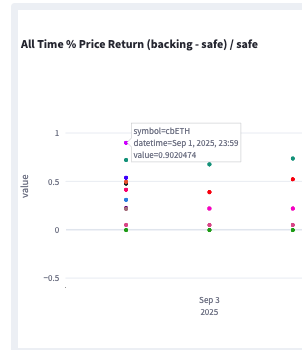

it appear that we lost a bunch of backing? or safe price values here

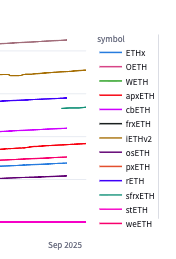

We lost a bunch of backing values on LSTs here, not yet sure why


